# Task 1b

write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the hamspam.csv to test it out. 

In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the Dataset
file_path = "hamspam.csv"
df = pd.read_csv(file_path)
df.shape

(1000, 5)

In [3]:
df.head()

,ID,Contains Link,Contains Money Words,Length,Class
0,1,Yes,Yes,Long,Spam
1,2,No,No,Long,Spam
2,3,Yes,No,Long,Ham
3,4,No,Yes,Short,Ham
4,5,Yes,No,Long,Ham


In [4]:
# Encode categorical variables as 0 and 1
cols_list = ['Contains Link', 'Contains Money Words', 'Length', 'Class']
label_encoders = {}
for col in cols_list:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
df.head()

,ID,Contains Link,Contains Money Words,Length,Class
0,1,1,1,0,1
1,2,0,0,0,1
2,3,1,0,0,0
3,4,0,1,1,0
4,5,1,0,0,0


In [6]:
# Split dataset into features and target
X = df.drop(columns=['ID', 'Class'])  
y = df['Class']  

In [7]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 3) (200, 3) (800,) (200,)


## Naive Bayes Model

In [9]:
# Train Naive Bayes Model
nb_model = GaussianNB()
# fit the model
nb_model.fit(X_train, y_train)
# predict on the text data
nb_predictions = nb_model.predict(X_test)

In [10]:
# print the predictions
nb_predictions

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1])

In [11]:
# evaulate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions, target_names=["Ham", "Spam"])

In [12]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("\nNaive Bayes Classification Report:\n", nb_report)

Naive Bayes Accuracy: 0.55

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Ham       0.63      0.56      0.59       117
        Spam       0.46      0.54      0.50        83

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.56      0.55      0.55       200



## KNN Model

In [13]:
# Train KNN Model (K=2)
knn_model = KNeighborsClassifier(n_neighbors=2)
# fit the model
knn_model.fit(X_train, y_train)
# predict on the text data
knn_predictions = knn_model.predict(X_test)

In [14]:
# Evaluate Models
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions, target_names=["Ham", "Spam"])

In [15]:
# Print results
print("KNN Accuracy:", knn_accuracy)
print("\nKNN Classification Report:\n", knn_report)

KNN Accuracy: 0.555

KNN Classification Report:
               precision    recall  f1-score   support

         Ham       0.58      0.89      0.70       117
        Spam       0.35      0.08      0.14        83

    accuracy                           0.56       200
   macro avg       0.46      0.49      0.42       200
weighted avg       0.48      0.56      0.47       200



# Task 2b

Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); 

using the hamspam.csv, ask to output an ROC curve and AUC score. 

(Hint: if you fit a decision tree, you might want to reduce max_depth) 

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [17]:
# Decision Tree classifier (with limited depth)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]  # Probability of being Spam

In [19]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [20]:
# print the AUC score
print("AUC Score:", roc_auc)

AUC Score: 0.5217794253938832


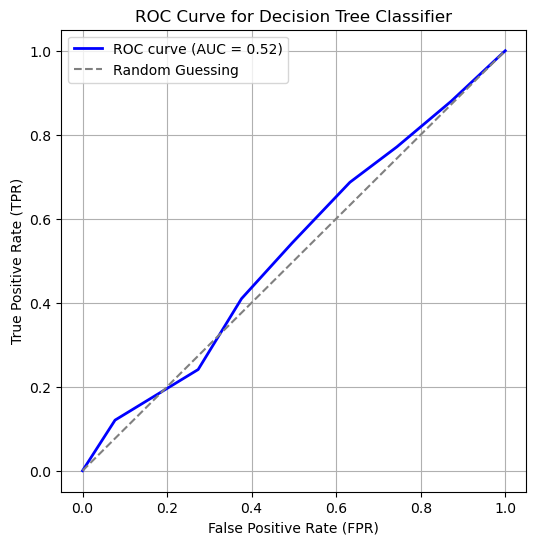

In [22]:
# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.grid()
plt.show()